## KCB 결제 및 신용 데이터 분석

In [1]:
# 모듈 import
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# 디렉토리 변경
os.chdir(r'C:/Users/jhbea/OneDrive/바탕 화면/Danalyze')

In [3]:
# 카드데이터
df = pd.read_csv('credit_card_data.csv')
#처음 csv 읽어 올 때는 인코딩 따로 주지 말고 읽어볼 것 .
#오류 발생 시 여러 채널로 파일 전송하는 과정에서 훼손되었을 수 있기 때문에 되도록 원 제공자에게 받을 것.

In [4]:
df.head(5)

,pop_cd,year,month,avg_score,avg_rat,city,sex,ages,population,num_opencard,...,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_payment,credit_card_installments_payment
0,L011,2016,1,812,2,서울,NaN,10대,55000,1.44,...,0,0,0,1120000,8210000,78020000,92170000,87260000,0,0
1,L011,2016,2,773,4,서울,NaN,10대,380000,1.71,...,510000,220000,1020000,680000,4660000,23300000,8260000,42410000,4000,1000
2,L011,2016,3,771,4,서울,NaN,10대,387000,1.75,...,490000,210000,1140000,640000,4370000,22930000,8300000,41710000,3000,1000
3,L011,2016,4,770,4,서울,NaN,10대,412000,1.76,...,510000,240000,1340000,510000,4770000,22160000,9460000,41040000,4000,1000
4,L011,2016,5,771,4,서울,NaN,10대,414000,1.75,...,490000,340000,1490000,640000,4740000,21960000,9660000,40850000,3000,1000


In [5]:
df.columns

Index(['pop_cd', 'year', 'month', 'avg_score', 'avg_rat', 'city', 'sex',
       'ages', 'population', 'num_opencard', 'num_usecard',
       'monthly_card_spend', 'monthly_lc', 'monthly_loan', 'monthly_bk_loan',
       'monthly_cd_loan', 'monthly_installments_loan',
       'monthly_insurance_loan', 'monthly_sbk_loan', 'loan_commitment',
       'inst_rep_loanb', 'ls_rep_loanb', 'credit_loan', 'mortgage_loan',
       'credit_card_payment', 'credit_card_installments_payment'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 26 columns):
pop_cd                              3888 non-null object
year                                3888 non-null int64
month                               3888 non-null int64
avg_score                           3888 non-null int64
avg_rat                             3888 non-null int64
city                                3456 non-null object
sex                                 432 non-null object
ages                                3888 non-null object
population                          3888 non-null int64
num_opencard                        3888 non-null float64
num_usecard                         3888 non-null float64
monthly_card_spend                  3888 non-null int64
monthly_lc                          3888 non-null int64
monthly_loan                        3888 non-null int64
monthly_bk_loan                     3888 non-null int64
monthly_cd_loan                     3888 non-n

### 코드분류 방법이 두가지 (지역+나이) 랑 (성별+나이)
#### df_r = (지역+나이) ( v ) <br> df_s = (성별+나이)

credit_card_data.csv 안에는 전체 집단을 두가지 기준으로 분류한 데이터가 섞여 있었다.
<br>이를 두 개의 DataFrame으로 분리 하였다.

* 성별 정보만 있는 row들

In [7]:
df_s=df[(df.sex == '남자') | (df.sex=='여자')]

* 지역정보가 포함된 row들

In [8]:
df_r = df[-((df.sex == '남자') | (df.sex=='여자'))]

In [9]:
df_r.population.sum()

1090371000

#### 지역 및 연령에 의해 나눠집 집단(df_r)을 분석하기로 결정하였다.


In [10]:
#성별 정보는 필요없으니까 drop한다
df_r = df_r.drop(columns=['sex'])

In [11]:
# 결측치 없음 
df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3456 entries, 0 to 3839
Data columns (total 25 columns):
pop_cd                              3456 non-null object
year                                3456 non-null int64
month                               3456 non-null int64
avg_score                           3456 non-null int64
avg_rat                             3456 non-null int64
city                                3456 non-null object
ages                                3456 non-null object
population                          3456 non-null int64
num_opencard                        3456 non-null float64
num_usecard                         3456 non-null float64
monthly_card_spend                  3456 non-null int64
monthly_lc                          3456 non-null int64
monthly_loan                        3456 non-null int64
monthly_bk_loan                     3456 non-null int64
monthly_cd_loan                     3456 non-null int64
monthly_installments_loan           3456 non-n

* df_r: (16개 시도) * (16.01~17.12 = 24개월) * (10대 부터 90대까지 9개 구간) = 3456

# --------잠시 보류------------------

In [12]:
# 전 기간 다 더하면 144개 구분.(시간으로 그룹바이 )
# 연령대별로 2년간 월별 추이가 다른지 아닌지 확인

# 서울 거주 30대 월 카드사용총액
df_s30=df_r[(df_r.ages == '30대') & (df_r.city == '서울')]

df_s30.shape

#시각화 lib
import seaborn as sns

df_s30.monthly_card_spend

sns.barplot(df_s30.index,df_s30.value)

# ------------------------------------

### 지역별 대출 데이터 시각화 

* 5개(bk,cd,installment,insurance,sbk) 분류 시각화 도출

month
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
Name: monthly_loan, dtype: object

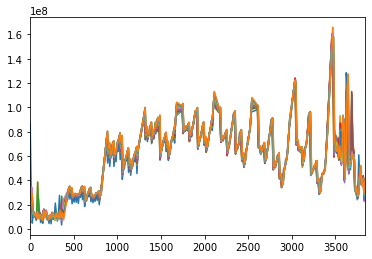

In [13]:
# 년 월 별로 그룹화 진행 
dfloan=df_r.groupby(['month'])['monthly_loan'] 
dfloan.plot()

## <제주도 신용 및 결제 데이터>
### -군집화를 통한 안정성 분석

In [14]:
dfjj=pd.read_csv('jeju_financial_life_data.csv')

In [15]:
dfjj.columns

Index(['zip_cd', 'year_month', 'x_axis', 'y_axis', 'sex', 'age', 'job_majorc',
       'job_smallc', 'job_public', 'job_profession', 'job_self', 'job_none',
       'job_other', 'avg_income', 'med_income', 'avg_spend',
       'avg_foreign_spend', 'avg_debt', 'avg_debt_credit', 'avg_debt_noneb',
       'avg_debt_mortgage', 'avg_debt_deposit', 'avg_debt_collateral',
       'avg_credit_rat', 'medium_resid_rat', 'large_resid_rat',
       'vehicle_own_rat'],
      dtype='object')

In [16]:
# 시간이 무의미하므로 연월데이터를 없앤다.
dfjj = dfjj.drop(columns=['year_month'])

In [17]:
#결측치 파악
dfjj.info() 
#결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10422 entries, 0 to 10421
Data columns (total 26 columns):
zip_cd                 10422 non-null int64
x_axis                 10422 non-null float64
y_axis                 10422 non-null float64
sex                    10422 non-null int64
age                    10422 non-null int64
job_majorc             10422 non-null float64
job_smallc             10422 non-null float64
job_public             10422 non-null float64
job_profession         10422 non-null float64
job_self               10422 non-null float64
job_none               10422 non-null float64
job_other              10422 non-null float64
avg_income             10422 non-null int64
med_income             10422 non-null int64
avg_spend              10422 non-null int64
avg_foreign_spend      10422 non-null int64
avg_debt               10422 non-null int64
avg_debt_credit        10422 non-null int64
avg_debt_noneb         10422 non-null int64
avg_debt_mortgage      10422 non-null

In [18]:
# 사이즈 확인 
dfjj.shape # 27개 칼럼.

(10422, 26)

#### 안정성 지표로서 <u>가계수지지표</u>를 사용한다. 
#### dataframe 중 avg_income / avg_spend를 이용한다. 

In [19]:
dfjj[dfjj.large_resid_rat == -999999].shape
# 주거비율 -999999인 row 는 7873

(7873, 26)

### Folium 을 사용하여 지도위에 Mark하기 : <br>최종적으로 특정 조건에 맞는 count를 시각화 할 수 있도록 함.
* MarkerCluster를 이용하여 cluster안의 값들을 count한다. 

In [20]:
import folium 
from folium.plugins import MarkerCluster

#test용으로 1행의 정보를 찍어본다.
m = folium.Map(
    location=[33.362134,126.533345], #한라산 백록담
    zoom_start=10.5
)

for i in range(0,1000):
    folium.Marker(
        location=[dfjj.y_axis[i],dfjj.x_axis[i]],
        popup='BAE JUNHA ZZANG!',
        icon=folium.Icon(color='blue',icon='circle')
        
    ).add_to(m)

m.save('testmap.html')

#### MARKER CLUSTER

* marker cluster의 동작을 확인한다.

m = folium.Map(
    location=[33.362134,126.533345], #한라산 백록담
    zoom_start=10.5
)

marker_cluster = MarkerCluster().add_to(m)

for i in range(0,1000):
    folium.Marker(
        location=[dfjj.y_axis[i],dfjj.x_axis[i]],
        popup='cluster test',
        icon=folium.Icon(color='blue',icon='circle')
        
    ).add_to(marker_cluster)

m.save('testmap.html')

가계수지지표(Household Income Index,이하 hii)는 <br>가계의 안정성을 간략히 보여주는 지표로서, <br> 1보다 큰 경우 수입보다 지출이 큰 경우 적자상태로 볼 수 있다.<br><br>그러므로 [hii > 1] 인 인구의 도수를 파악하고 이를 지역 별로 비교하는 것이 유의미 할 것으로 판단하였다.

### hii가 1이상으로 위험군으로 분류 될 수 있는 인구의 도수를 지도상에 시각화한다.
#### 코드 작성 순서 
1. dfjj에서 [avg_income / avg_spend >1] 인 행을 조건부 슬라이싱하여 reframing후 dfhii로 저장한다. 
2. dfhii의 행들을 지도상에 clustering하여 시각화 한다.

dfhii = dfjj[(dfjj.avg_spend / (dfjj.avg_income + 1 )) > 1 ].copy()
# income이 0인 경우를 대비하여 분모에 1을 더한다.

len(dfhii.index)
dfhii.shape

dfhii.head(5)

In [21]:
#Map 객체 만들기
'''m = folium.Map(
    location=[33.362134,126.533345], #한라산 백록담
    zoom_start=10.5
)

marker_cluster = MarkerCluster().add_to(m)

for i in range(0,len(dfhii.index)-1):
    folium.Marker(
        location=[dfhii.iloc[i,2],dfhii.iloc[i,1]],
        popup='Household Index is {}',#.format((dfhii.iloc[i,14] / dfhii.iloc[i,12]+1)),
        icon=folium.Icon(color='red',icon='angry')
        
    ).add_to(marker_cluster)
m.save('hiimap.html') '''


"m = folium.Map(\n    location=[33.362134,126.533345], #한라산 백록담\n    zoom_start=10.5\n)\n\nmarker_cluster = MarkerCluster().add_to(m)\n\nfor i in range(0,len(dfhii.index)-1):\n    folium.Marker(\n        location=[dfhii.iloc[i,2],dfhii.iloc[i,1]],\n        popup='Household Index is {}',#.format((dfhii.iloc[i,14] / dfhii.iloc[i,12]+1)),\n        icon=folium.Icon(color='red',icon='angry')\n        \n    ).add_to(marker_cluster)\nm.save('hiimap.html') "

m

### Clustering 말고 그냥 marker로 색깔만 달리해서 지도위에 점찍기 <br>가계수지지표 수준별 분포도 
* 기준:<br> 0~0.4 = 저위험 ->Blue<br>0.4~0.7 = 중위험 ->Green<br>0.7~1.0 = 고위험 ->Yellow<br>1 > in danger ->Red

In [22]:
# 지도를 표시를 위한 DataFrame.
dfm=dfjj.loc[:,['x_axis','y_axis','avg_income','avg_spend']]


In [23]:
# 위험도 구분하여 데이터프레임 분리.
hi = dfm.avg_spend / (dfm.avg_income + 1 )
dfred = dfm[(dfm.avg_spend / (dfm.avg_income + 1 )) > 1 ].copy()
dfyellow = dfm[(hi <= 1) & (hi >= 0.8) ].copy()
dfgreen = dfm[(hi >= 0.4) & (hi < 0.8) ].copy()
dfblue = dfm[(dfm.avg_spend / (dfm.avg_income + 1 )) < 0.4 ].copy()

In [24]:
print(len(dfred.index))
print(len(dfyellow.index))
print(len(dfgreen.index))
print(len(dfblue.index))
dfred.head(5)

49
0
32
10341


,x_axis,y_axis,avg_income,avg_spend
220,126.541308,33.498187,0,381404
604,126.483401,33.480725,0,187476
929,126.283430,33.256071,0,2278491
967,126.325526,33.947015,0,217043
979,126.325526,33.947015,0,62929


* map에 점.찍.기

In [25]:
m = folium.Map(
    location=[33.362134,126.533345], #한라산 백록담
    zoom_start=10.5
)
# red 추가
for i in range(0,len(dfred.index)-1):
    folium.Marker(
        location=[dfred.iloc[i,1],dfred.iloc[i,0]] ,
        popup='in Danger',
        icon=folium.Icon(color='red',icon='circle')
        
    ).add_to(m)
    
#m.save('pointmap.html')

In [26]:
# # yellow 추가 -- counts가 0임
# for i in range(0,len(dfred.index)-1):
#     folium.Marker(
#         location=[dfyellow.iloc[i,1],dfyellow.iloc[i,0]] ,
#         popup='High Risk',
#         icon=folium.Icon(color='yellow',icon='circle')
        
#     ).add_to(m)
    
# #m.save('pointmap.html')

In [27]:
# green 추가 
for i in range(0,len(dfgreen.index)-1):
    folium.Marker(
        location=[dfgreen.iloc[i,1],dfgreen.iloc[i,0]] ,
        popup='Good',
        icon=folium.Icon(color='green',icon='circle')
        
    ).add_to(m)
    
#m.save('pointmap.html')

# blue 추가 - clustering
marker_cluster = MarkerCluster().add_to(m)

for i in range(0,len(dfblue.index)-1):
    if i%10 == 0:
        folium.Marker(
            location=[dfblue.iloc[i,1],dfblue.iloc[i,0]] ,
            popup='Great',
            icon=folium.Icon(color='blue',icon='circle')

        ).add_to(marker_cluster)
    
m.save('pointmap.html')

### map 출력
m

In [28]:
# blue 추가
marker_cluster = MarkerCluster().add_to(m)

for i in range(0,len(dfblue.index)-1):
    if i%50 == 0:
        folium.Marker(
            location=[dfblue.iloc[i,1],dfblue.iloc[i,0]] ,
            popup='Great',
            icon=folium.Icon(color='blue',icon='circle')

        ).add_to(m)
    
m.save('pointmap.html')

In [ ]:
m

### 위험군 분포 요인 분석: 왜 제주시에는 소비 > 소득인 사람들이 다른 곳 보다 많을까?
1. 위험군들 데이터를 시각화 해서 분석
2. 위험군들과 다른 지역 사람들 비교분석
3. 지역적 차이로 부터 유추할 수 있는 요인등을 분석
4. 인사이트 발굴

In [29]:
dfred.head(5)

,x_axis,y_axis,avg_income,avg_spend
220,126.541308,33.498187,0,381404
604,126.483401,33.480725,0,187476
929,126.283430,33.256071,0,2278491
967,126.325526,33.947015,0,217043
979,126.325526,33.947015,0,62929


In [30]:
len(dfred.index)

49

In [32]:
dfred.columns

Index(['x_axis', 'y_axis', 'avg_income', 'avg_spend'], dtype='object')

In [35]:
dfdanger = dfjj[hi > 1]
dfdanger.columns

Index(['zip_cd', 'x_axis', 'y_axis', 'sex', 'age', 'job_majorc', 'job_smallc',
       'job_public', 'job_profession', 'job_self', 'job_none', 'job_other',
       'avg_income', 'med_income', 'avg_spend', 'avg_foreign_spend',
       'avg_debt', 'avg_debt_credit', 'avg_debt_noneb', 'avg_debt_mortgage',
       'avg_debt_deposit', 'avg_debt_collateral', 'avg_credit_rat',
       'medium_resid_rat', 'large_resid_rat', 'vehicle_own_rat'],
      dtype='object')

[단독]
* 1-1 성별 비율
* 부채규모
* 직업비율(대/공/중/자)
* 수입-지출 총규모 
* 주거형태
